Import necessary libraries

In [942]:
import pandas as pd
import numpy as np

Import dataset

In [943]:
df=pd.read_csv("Data.csv")

Basic data understanding

In [944]:
df.head()

,id,project code,pq #,po / so #,asn/dn #,country,managed by,fulfill via,vendor inco term,shipment mode,...,unit of measure (per pack),line item quantity,line item value,pack price,unit price,manufacturing site,first line designation,weight (kilograms),freight cost (usd),line item insurance (usd)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,True,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",True,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,True,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",True,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",True,7590,45450.08,NaN


In [945]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            10324 non-null  int64  
 1   project code                  10324 non-null  object 
 2   pq #                          10324 non-null  object 
 3   po / so #                     10324 non-null  object 
 4   asn/dn #                      10324 non-null  object 
 5   country                       10324 non-null  object 
 6   managed by                    10324 non-null  object 
 7   fulfill via                   10324 non-null  object 
 8   vendor inco term              10324 non-null  object 
 9   shipment mode                 9964 non-null   object 
 10  pq first sent to client date  10324 non-null  object 
 11  po sent to vendor date        10324 non-null  object 
 12  scheduled delivery date       10324 non-null  object 
 13  d

In [946]:
df.isnull().sum()

,0
id,0
project code,0
pq #,0
po / so #,0
asn/dn #,0
country,0
managed by,0
fulfill via,0
vendor inco term,0
shipment mode,360


In [947]:
df.columns

Index(['id', 'project code', 'pq #', 'po / so #', 'asn/dn #', 'country',
       'managed by', 'fulfill via', 'vendor inco term', 'shipment mode',
       'pq first sent to client date', 'po sent to vendor date',
       'scheduled delivery date', 'delivered to client date',
       'delivery recorded date', 'product group', 'sub classification',
       'vendor', 'item description', 'molecule/test type', 'brand', 'dosage',
       'dosage form', 'unit of measure (per pack)', 'line item quantity',
       'line item value', 'pack price', 'unit price', 'manufacturing site',
       'first line designation', 'weight (kilograms)', 'freight cost (usd)',
       'line item insurance (usd)'],
      dtype='object')

In [948]:
df.shape

(10324, 33)

In [949]:
df["first line designation"].unique().shape
df["pq #"].unique()
df["po / so #"]
df["sub classification"].unique()
df["item description"]
df["freight cost (usd)"].unique()
df["vendor inco term"].unique()
df["dosage"].unique()

array([nan, '10mg/ml', '150mg', '30mg', '200mg', '200/50mg', '150/300mg',
       '300mg', '2g', '1mg/ml', '600mg', '25mg', '20mg', '250mg', '400mg',
       '20/120mg', '50+153mg', '600/200/300mg', '100mg', '15mg',
       '80/20mg/ml', '600mg/2ml', '150/200/30mg', '100/25mg', '50mg',
       '300/200mg', '150/300/200mg', '133.3/33.3mg', '80mg/ml', '30/6mg',
       '20mg/ml', '40mg', '300/150/300mg', '500/25mg', '30/50/6mg',
       '150/300+200mg', '150/30mg', '150/200/40mg', '30mg/ml',
       '200/300mg', '150/300+300mg', '300/300mg', '60/100/12mg',
       '600/300/300mg', '300/100mg', '30/60mg', '60/30mg', '30/50/60mg',
       '500mg', '125mg', '600/300mg', '60mg', '60/12mg',
       '150/300mg+600mg', '50mg/g'], dtype=object)

Renamed 'id' column to 'ID'

In [950]:
df=df.rename(columns={"id":"ID"})

Drop duplicate entries in 'ID' column

In [951]:
df.drop_duplicates(subset="ID")

,ID,project code,pq #,po / so #,asn/dn #,country,managed by,fulfill via,vendor inco term,shipment mode,...,unit of measure (per pack),line item quantity,line item value,pack price,unit price,manufacturing site,first line designation,weight (kilograms),freight cost (usd),line item insurance (usd)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,True,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.00,6.20,0.03,"Aurobindo Unit III, India",True,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,True,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.80,3.99,0.07,"Ranbaxy, Paonta Shahib, India",True,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.00,3.20,0.05,"Aurobindo Unit III, India",True,7590,45450.08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",False,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,False,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),161.71
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,...,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,False,Weight Captured Separately,Freight Included in Commodity Cost,5284.04
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,17465,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,True,1392,Freight Included in Commodity Cost,134.03


Convert date column datatype  from object to date format

In [952]:
df["po sent to vendor date"]=pd.to_datetime(df["po sent to vendor date"],errors="coerce")
df["po sent to vendor date"]=df["po sent to vendor date"].dt.date


<ipython-input-952-daf0114e0dfc>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["po sent to vendor date"]=pd.to_datetime(df["po sent to vendor date"],errors="coerce")


Drop unneccessary column for data analysis

In [953]:
df.drop(["pq #"],axis=1,inplace=True)
df.drop(["asn/dn #"],axis=1,inplace=True)
df.drop(["po / so #"],axis=1,inplace=True)
df.drop("po sent to vendor date",axis=1,inplace=True)
df.drop("pq first sent to client date",axis=1,inplace=True)
df.drop("item description",axis=1,inplace=True)
df.drop("delivery recorded date",axis=1,inplace=True)

In [954]:
df.drop("dosage",axis=1,inplace=True)

Imputing missing entries in 'shipment mode' column with mode of corresponding countries in 'country' column.

In [955]:
missing=df[df["shipment mode"].isna()]
country=missing["country"]

In [956]:
new=df[df["country"]=="Zambia"]
co=new["shipment mode"]
print(co.mode())

0    Truck
Name: shipment mode, dtype: object


In [957]:
df.loc[(df['country'] == 'South Africa')&(df['shipment mode'].isna()),'shipment mode'] = 'Truck'
df.loc[(df["country"]=="Ethiopia")&(df["shipment mode"].isna()),"shipment mode"]="Air"
df.loc[(df["country"]=="Nigeria")&(df["shipment mode"].isna()),"shipment mode"]="Air Charter"
df.loc[(df["country"]=="Guyana")&(df["shipment mode"].isna()),"shipment mode"]="Air"
df.loc[(df["country"]=="Zambia")&(df["shipment mode"].isna()),"shipment mode"]="Truck"
df.loc[(df["country"]=="Côte d'Ivoire")&(df["shipment mode"].isna()),"shipment mode"]="Air"
df.loc[(df["country"]=="Zimbabwe")&(df["shipment mode"].isna()),"shipment mode"]="Truck"
df.loc[(df["country"]=="Namibia")&(df["shipment mode"].isna()),"shipment mode"]="Air"
df.loc[(df["country"]=="Uganda")&(df["shipment mode"].isna()),"shipment mode"]="Air"
df.loc[(df["country"]=="Tanzania")&(df["shipment mode"].isna()),"shipment mode"]="Air"
df.loc[(df["country"]=="Botswana")&(df["shipment mode"].isna()),"shipment mode"]="Air"
df.loc[(df["country"]=="Haiti")&(df["shipment mode"].isna()),"shipment mode"]="Air"

In [958]:
df["shipment mode"].isna().sum()

0

Imputing missing values in 'line item insurance' column with mean.

In [959]:
np.round(df["line item insurance (usd)"].mean(),2)
df["line item insurance (usd)"]=df["line item insurance (usd)"].fillna(240.12)

Encoding categorical columns.

In [960]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [961]:
df["managed by"]=encoder.fit_transform(df["managed by"])


In [962]:
df["vendor"]=encoder.fit_transform(df["vendor"])


In [963]:
df["brand"]=encoder.fit_transform(df["brand"])


In [964]:
df["dosage form"]=encoder.fit_transform(df["dosage form"])


In [965]:
df["molecule/test type"]=encoder.fit_transform(df["molecule/test type"])


In [966]:
df["fulfill via"]=encoder.fit_transform(df['fulfill via'])


In [967]:
df["first line designation"]=encoder.fit_transform(df["first line designation"])

In [968]:
df["vendor inco term"]=encoder.fit_transform(df["vendor inco term"])

Preprocessing 'weight (kilograms)' column

In [969]:
df["weight (kilograms)"].str.contains("See").sum()
df["weight (kilograms)"].str.contains("Weight").sum()

1507

In [970]:
df["weight (kilograms)"]=pd.to_numeric(df["weight (kilograms)"],errors="coerce")

In [971]:
df["weight (kilograms)"].isna().sum()
df["weight (kilograms)"].fillna(3424.44,inplace=True)

<ipython-input-971-379ba34e3184>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["weight (kilograms)"].fillna(3424.44,inplace=True)


Preprocessing 'freight cost (usd)' column

In [972]:
df["freight cost (usd)"]=pd.to_numeric(df["freight cost (usd)"],errors="coerce")

In [973]:
df["freight cost (usd)"].isna().sum()

4126

In [974]:
df["scheduled delivery date"].dtype

dtype('O')

In [975]:
df["delivered to client date"].dtype

dtype('O')

In [976]:
df["scheduled delivery date"]=pd.to_datetime(df["scheduled delivery date"],errors="coerce")

<ipython-input-976-004aee07769c>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["scheduled delivery date"]=pd.to_datetime(df["scheduled delivery date"],errors="coerce")


In [977]:
df["delivered to client date"]=pd.to_datetime(df["delivered to client date"],errors="coerce")

<ipython-input-977-ce63497ce563>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["delivered to client date"]=pd.to_datetime(df["delivered to client date"],errors="coerce")


In [978]:
df.isnull().sum()

,0
ID,0
project code,0
country,0
managed by,0
fulfill via,0
vendor inco term,0
shipment mode,0
scheduled delivery date,0
delivered to client date,0
product group,0


In [979]:
df["freight cost (usd)"]=df["freight cost (usd)"].fillna(df["freight cost (usd)"].mean())

Import libraries for data visualization

In [980]:
import seaborn as sns
import matplotlib.pyplot as plt

Histogram

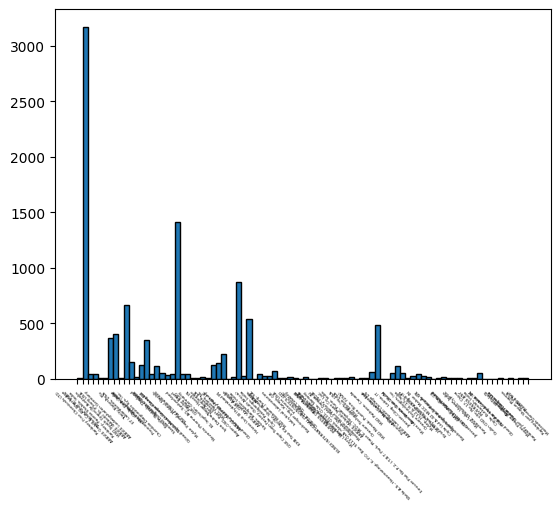

In [981]:
plt.hist(df["manufacturing site"],bins=88,edgecolor="black")
plt.xticks(rotation=135,size=3)
plt.show()

PAIR PLOT


In [982]:
#sns.pairplot(df)

BAR PLOT


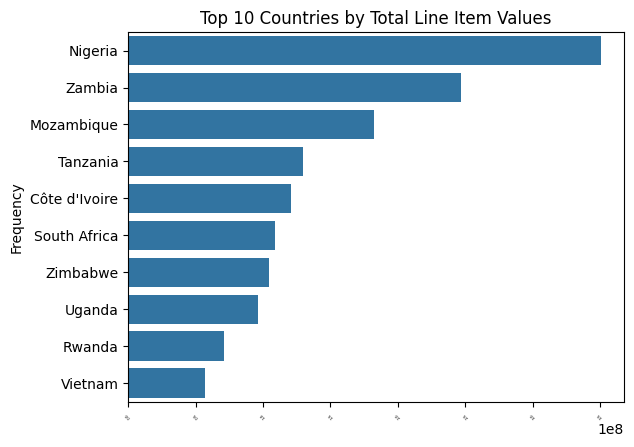

In [983]:
country=df.groupby("country")["line item value"].sum().sort_values(ascending=False).head(10)
sns.barplot(x=country.values,y=country.index)
plt.xticks(rotation=135,size=3)
plt.ylabel("Frequency")
plt.title("Top 10 Countries by Total Line Item Values")
plt.show()

<Axes: ylabel='country'>

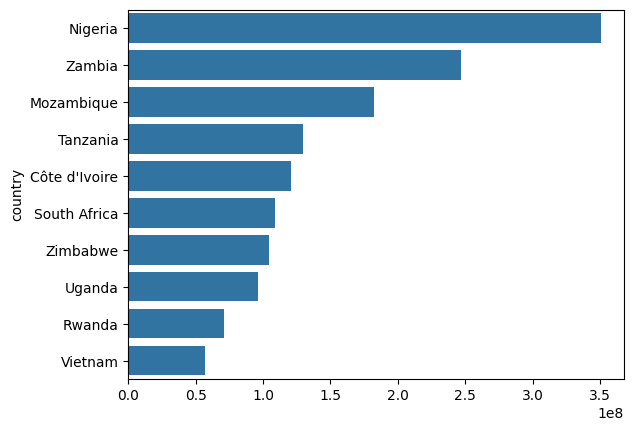

In [984]:
c2=df.groupby("country")["unit price"].mean().sort_values(ascending=False).head()
sns.barplot(x=country.values,y=country.index)

<Axes: ylabel='country'>

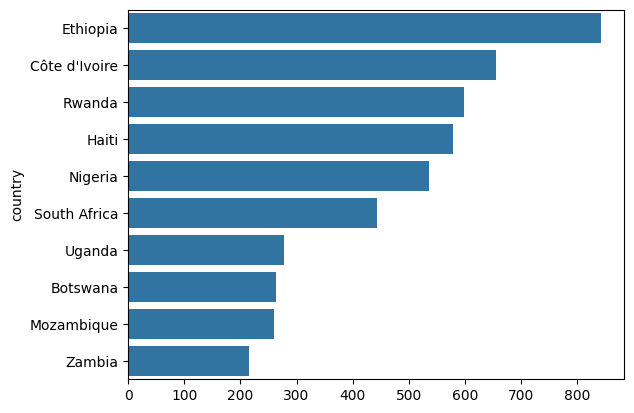

In [985]:
c3=df.groupby("country")["unit price"].sum().sort_values(ascending=False).head(10)
sns.barplot(x=c3.values,y=c3.index)

<Axes: ylabel='country'>

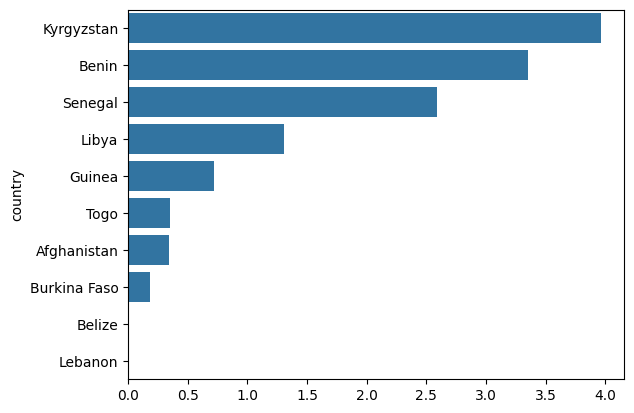

In [986]:
c4=df.groupby("country")["unit price"].sum().sort_values(ascending=False).tail(10)
sns.barplot(x=c4.values,y=c4.index)

<Axes: ylabel='country'>

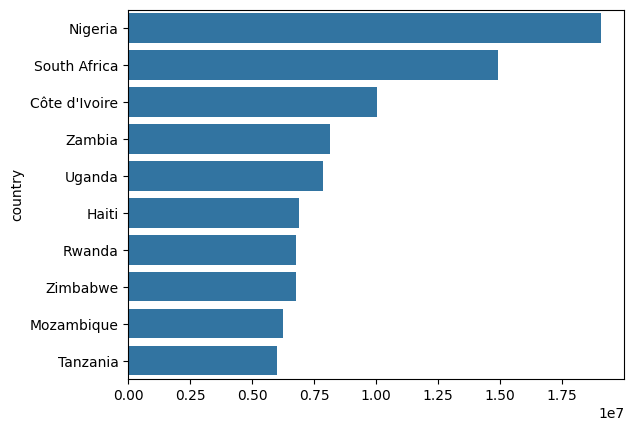

In [987]:
c5=df.groupby("country")["freight cost (usd)"].sum().sort_values(ascending=False).head(10)
sns.barplot(x=c5.values,y=c5.index)

<Axes: ylabel='country'>

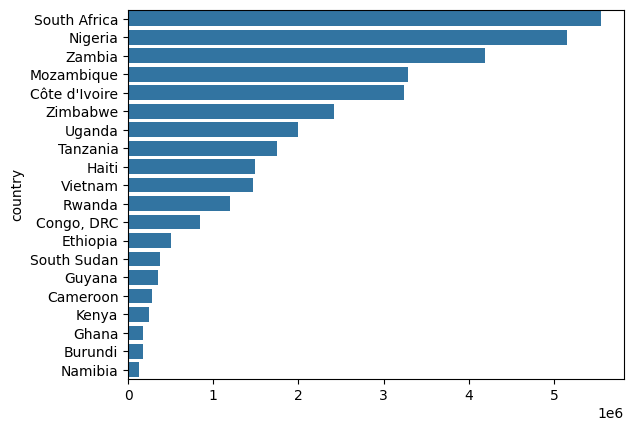

In [988]:
c6=df.groupby("country")["weight (kilograms)"].sum().sort_values(ascending=False).head(20)
sns.barplot(x=c6.values,y=c6.index)

Finding outliers in 'unit price' column

In [989]:
Q1=df["unit price"].quantile(0.25)
Q3=df["unit price"].quantile(0.75)
IQR=Q3-Q1
lb=Q1-1.5*IQR
ub=Q3+1.5*IQR
outliers=df[(df["unit price"]<lb) | (df["unit price"]>ub)]
print(outliers)

          ID project code       country  managed by  fulfill via  \
11        61   110-ZM-T01        Zambia           2            0   
21        96   102-NG-T01       Nigeria           2            0   
26       134   100-HT-T01         Haiti           2            0   
31       176   102-NG-T01       Nigeria           2            0   
38       361   125-HT-T01         Haiti           2            0   
...      ...          ...           ...         ...          ...   
6562   82004   102-GY-T30        Guyana           2            0   
6569   82062   116-ZA-T30  South Africa           2            0   
6760   82461   107-RW-T30        Rwanda           2            1   
7058   82856   102-SD-T30         Sudan           2            1   
10055  86457   109-TZ-T30      Tanzania           2            1   

       vendor inco term shipment mode scheduled delivery date  \
11                    5           Air              2007-01-08   
21                    5           Air              20

In [990]:
df["unit price"].replace(0,df["unit price"].mean(),inplace=True)

<ipython-input-990-52a532ce8fd1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["unit price"].replace(0,df["unit price"].mean(),inplace=True)


Heatmap

<Axes: >

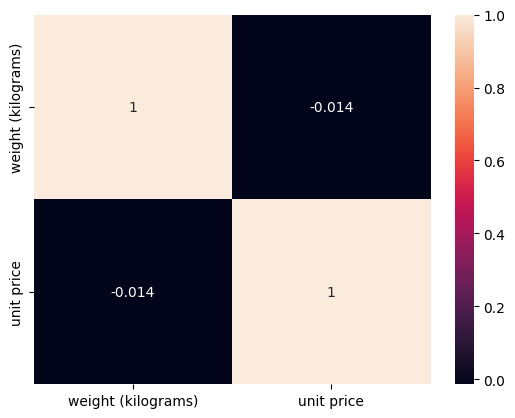

In [991]:
cols=df[["weight (kilograms)","unit price"]]
sns.heatmap(cols.corr(),annot=True)

<Axes: >

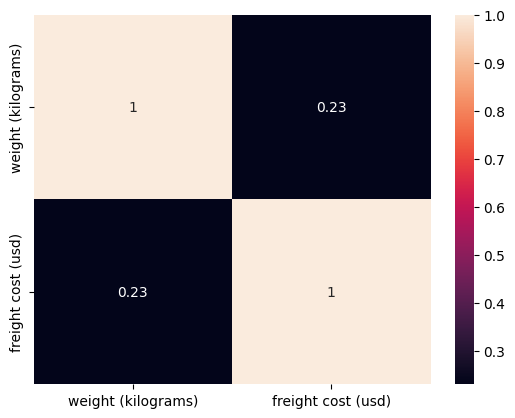

In [992]:
colms=df[["weight (kilograms)","freight cost (usd)"]]
df["freight cost (usd)"]=pd.to_numeric(df["freight cost (usd)"],errors="coerce")
sns.heatmap(colms.corr(),annot=True)

<Axes: >

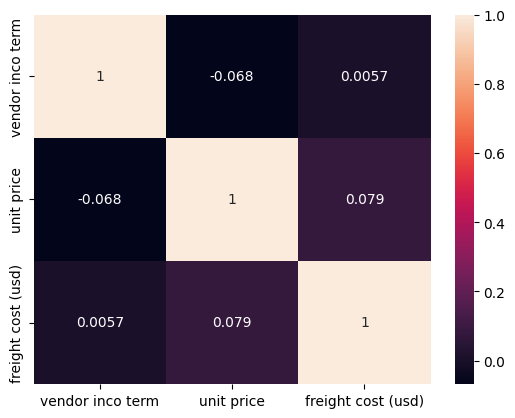

In [993]:
col1=df[["vendor inco term","unit price","freight cost (usd)"]]
sns.heatmap(col1.corr(),annot=True)

<Axes: >

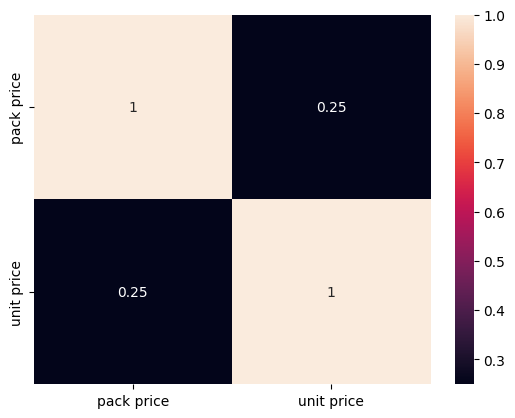

In [994]:
cols3=df[["pack price","unit price"]]
sns.heatmap(cols3.corr(),annot=True)

<Axes: >

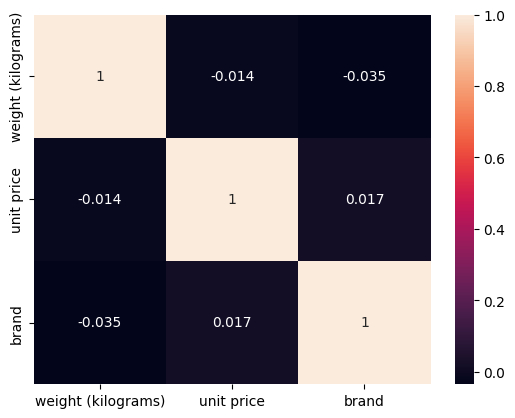

In [995]:
cols4=df[["weight (kilograms)","unit price","brand"]]
sns.heatmap(cols4.corr(),annot=True)

Barplot

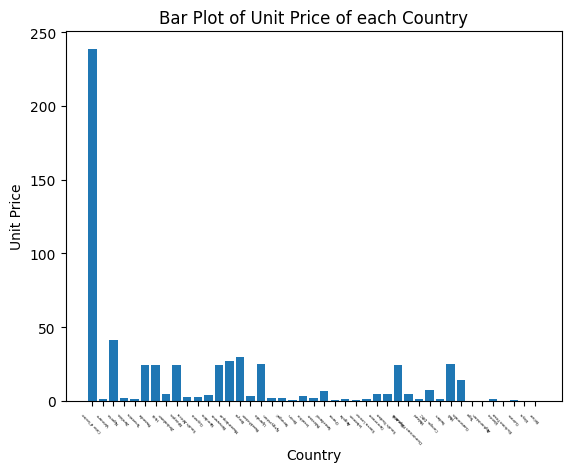

In [996]:
plt.bar(df["country"],df["unit price"])
plt.title("Bar Plot of Unit Price of each Country")
plt.xlabel("Country")
plt.ylabel("Unit Price")
plt.xticks(rotation=135,size=3)
plt.show()

Histogram

<Axes: xlabel='unit of measure (per pack)', ylabel='Count'>

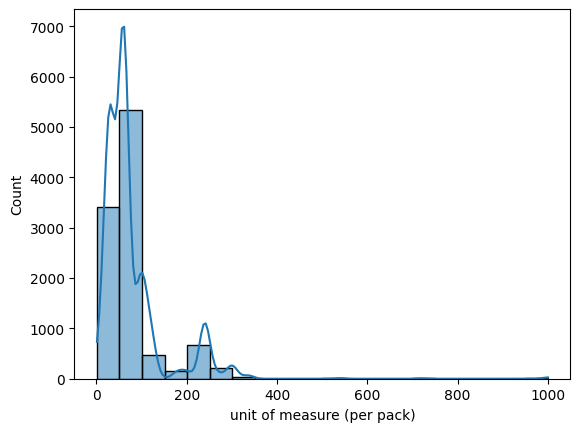

In [997]:
sns.histplot(df["unit of measure (per pack)"], kde=True, bins=20)

<Axes: xlabel='line item insurance (usd)', ylabel='Count'>

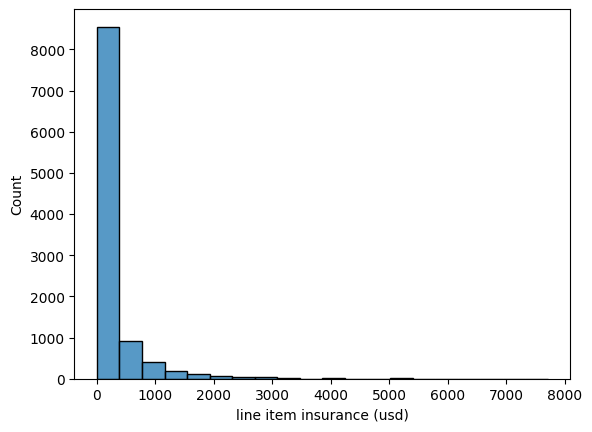

In [998]:
sns.histplot(df["line item insurance (usd)"],kde=False,bins=20)

Pie Chart

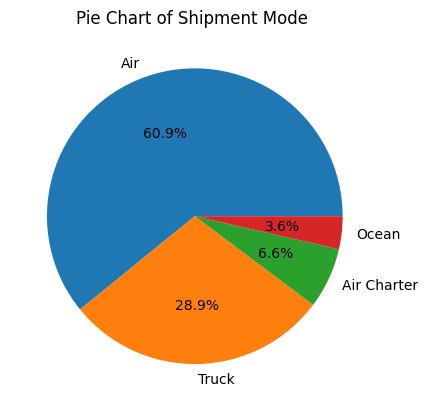

In [999]:
x=df["shipment mode"].value_counts()
plt.pie(x,labels=["Air","Truck","Air Charter","Ocean"],autopct='%1.1f%%')
plt.title("Pie Chart of Shipment Mode ")
plt.show()

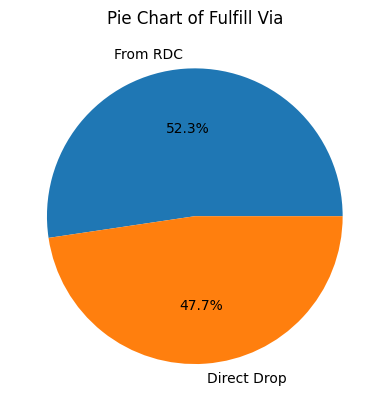

In [1000]:
x=df["fulfill via"].value_counts()
plt.pie(x,labels=["From RDC","Direct Drop"],autopct='%1.1f%%')
plt.title("Pie Chart of Fulfill Via")
plt.show()

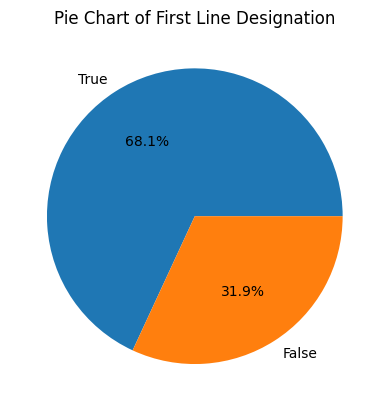

In [1001]:
x=df["first line designation"].value_counts()
plt.pie(x,labels=["True","False"],autopct="%1.1f%%")
plt.title("Pie Chart of First Line Designation")
plt.show()

Bar Plot

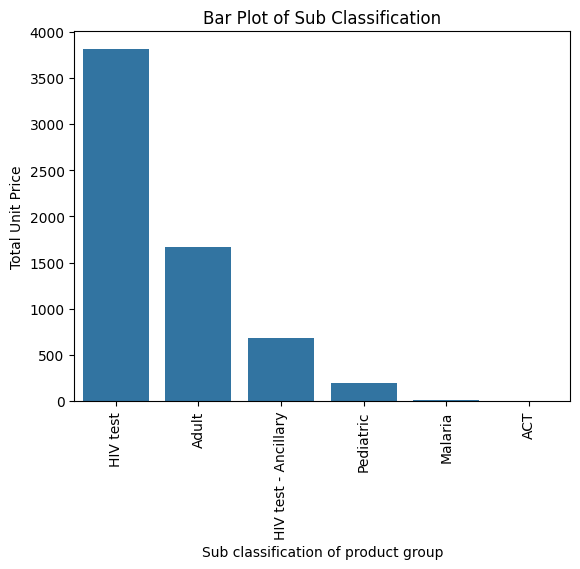

In [1002]:
subgroup=df.groupby("sub classification")["unit price"].sum().sort_values(ascending=False)
sns.barplot(x=subgroup.index,y=subgroup.values)
plt.title("Bar Plot of Sub Classification")
plt.xlabel("Sub classification of product group")
plt.ylabel("Total Unit Price")
plt.xticks(rotation=90)
plt.show()

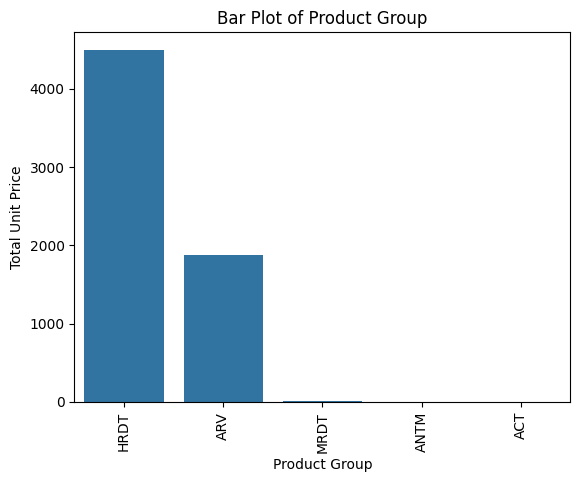

In [1003]:
group=df.groupby("product group")["unit price"].sum().sort_values(ascending=False)
sns.barplot(x=group.index,y=group.values)
plt.title("Bar Plot of Product Group")
plt.xlabel("Product Group")
plt.ylabel("Total Unit Price")
plt.xticks(rotation=90)
plt.show()

Heatmap

<Axes: >

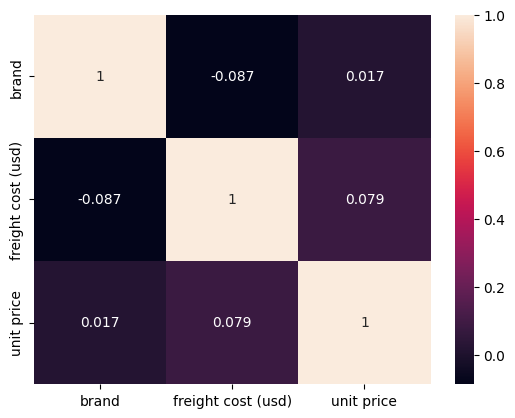

In [1004]:
cols5=df[["brand","freight cost (usd)","unit price"]]
sns.heatmap(cols5.corr(),annot=True)

In [1005]:
x1=df["scheduled delivery date"].dt.year
x2=df["delivered to client date"].dt.year

KDE PLOT

Text(0, 0.5, 'Unit Price')

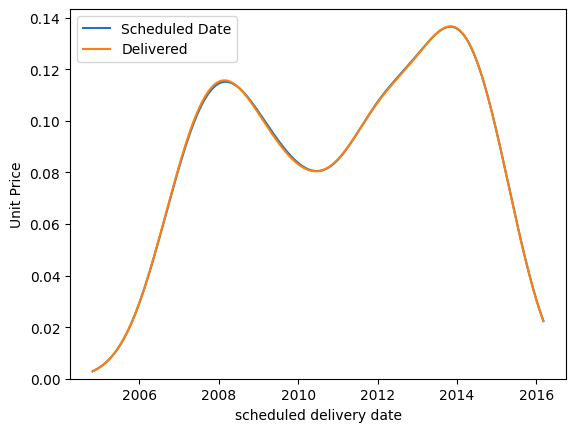

In [1006]:
sns.kdeplot(data=df,x=x1,weights=df['unit price'],label="Scheduled Date")
sns.kdeplot(data=df,x=x2,weights=df['unit price'],label="Delivered")
plt.legend()
plt.ylabel("Unit Price")

In [1007]:
df["scheduled delivery date"].dt.year.value_counts()

,count
scheduled delivery date,
2014,1528
2012,1273
2013,1272
2009,1253
2010,1204
2008,1029
2015,1017
2011,1011
2007,672


In [1008]:
df.drop("managed by",axis=1,inplace=True)

In [1009]:
df.isnull().sum()

,0
ID,0
project code,0
country,0
fulfill via,0
vendor inco term,0
shipment mode,0
scheduled delivery date,0
delivered to client date,0
product group,0
sub classification,0


Classification


In [1010]:
from sklearn.preprocessing import StandardScaler

In [1011]:
scaler=StandardScaler()

In [1012]:
from sklearn.model_selection import train_test_split

In [1013]:
#does weight is affecting the price
df[["weight (kilograms)","unit price"]]

,weight (kilograms),unit price
0,13.00,0.97
1,358.00,0.03
2,171.00,0.80
3,1855.00,0.07
4,7590.00,0.05
...,...,...
10319,3424.44,0.06
10320,3424.44,0.11
10321,3424.44,0.33
10322,1392.00,0.11


In [1014]:
weight=df.groupby("weight (kilograms)")["shipment mode"].sum()

In [1015]:
sns.lineplot(x=weight,y=df["unit price"],data=df)
plt.show()

In [1016]:
df.columns

Index(['ID', 'project code', 'country', 'fulfill via', 'vendor inco term',
       'shipment mode', 'scheduled delivery date', 'delivered to client date',
       'product group', 'sub classification', 'vendor', 'molecule/test type',
       'brand', 'dosage form', 'unit of measure (per pack)',
       'line item quantity', 'line item value', 'pack price', 'unit price',
       'manufacturing site', 'first line designation', 'weight (kilograms)',
       'freight cost (usd)', 'line item insurance (usd)'],
      dtype='object')

In [1017]:
df["first line designation"]

,first line designation
0,1
1,1
2,1
3,1
4,1
...,...
10319,0
10320,0
10321,0
10322,1


In [1018]:
df["country"]=encoder.fit_transform(df["country"])
df["shipment mode"]=encoder.fit_transform(df["shipment mode"])

In [1019]:
X=df[['country','fulfill via','shipment mode','line item value']]

In [1020]:
y=df["first line designation"]

In [1021]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [1022]:
from sklearn.linear_model import LogisticRegression
logistic_model=LogisticRegression()

In [1023]:
from sklearn.tree import DecisionTreeClassifier
decision_model=DecisionTreeClassifier()

In [1024]:
from sklearn.ensemble import RandomForestClassifier
random_model=RandomForestClassifier()

In [1025]:
from sklearn.svm import SVC
svc_model=SVC()

In [1026]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()

In [1027]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [1028]:
from sklearn.model_selection import train_test_split

In [1029]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [1030]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [1031]:
def best_classifier(model,X_train,X_test,y_train,y_test):
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  cm=confusion_matrix(y_test,y_pred)
  report=classification_report(y_test,y_pred)
  score=accuracy_score(y_test,y_pred)
  return cm,report,score

In [1032]:
m1=best_classifier(logistic_model,X_train_scaled,X_test_scaled,y_train,y_test)
m2=best_classifier(decision_model,X_train_scaled,X_test_scaled,y_train,y_test)
m3=best_classifier(random_model,X_train_scaled,X_test_scaled,y_train,y_test)
m4=best_classifier(knn_model,X_train_scaled,X_test_scaled,y_train,y_test)
m5=best_classifier(svc_model,X_train_scaled,X_test_scaled,y_train,y_test)

In [1033]:
print("Logistic Regression:")
print(m1[0])
print(m1[1])
print("Decision Tree Classifier:")
print(m2[0])
print(m2[1])
print("Random Forest Classifier:")
print(m3[0])
print(m3[1])
print("KNN Classifier:")
print(m4[0])
print(m4[1])
print("SVC Classifier:")
print(m5[0])
print(m5[1])

Logistic Regression:
[[  83  574]
 [ 133 1275]]
              precision    recall  f1-score   support

           0       0.38      0.13      0.19       657
           1       0.69      0.91      0.78      1408

    accuracy                           0.66      2065
   macro avg       0.54      0.52      0.49      2065
weighted avg       0.59      0.66      0.59      2065

Decision Tree Classifier:
[[ 337  320]
 [ 329 1079]]
              precision    recall  f1-score   support

           0       0.51      0.51      0.51       657
           1       0.77      0.77      0.77      1408

    accuracy                           0.69      2065
   macro avg       0.64      0.64      0.64      2065
weighted avg       0.69      0.69      0.69      2065

Random Forest Classifier:
[[ 333  324]
 [ 320 1088]]
              precision    recall  f1-score   support

           0       0.51      0.51      0.51       657
           1       0.77      0.77      0.77      1408

    accuracy                

SVC is the best classifier technique here.

Regression Tasks


In [1034]:
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()

In [1035]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [1036]:
from sklearn.ensemble import RandomForestRegressor
randomreg_model=RandomForestRegressor()

In [1037]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ID                          10324 non-null  int64         
 1   project code                10324 non-null  object        
 2   country                     10324 non-null  int64         
 3   fulfill via                 10324 non-null  int64         
 4   vendor inco term            10324 non-null  int64         
 5   shipment mode               10324 non-null  int64         
 6   scheduled delivery date     10324 non-null  datetime64[ns]
 7   delivered to client date    10324 non-null  datetime64[ns]
 8   product group               10324 non-null  object        
 9   sub classification          10324 non-null  object        
 10  vendor                      10324 non-null  int64         
 11  molecule/test type          10324 non-null  int64     

In [1038]:
c=df[["weight (kilograms)","shipment mode","brand","molecule/test type","unit of measure (per pack)","line item value"]]
d=df["line item insurance (usd)"]

In [1039]:
c_train,c_test,d_train,d_test=train_test_split(c,d,test_size=0.2,random_state=42)

In [1040]:
lr_fit=lr_model.fit(c_train,d_train)

In [1041]:
lr_pred=lr_fit.predict(c_test)

In [1042]:
mean_squared_error(d_test,lr_pred)

18453.530231661884

In [1043]:
mean_absolute_error(d_test,lr_pred)

61.832173254562264

In [1044]:
r2_score(d_test,lr_pred)

0.9144884625401858

In [1045]:
rreg_fit=randomreg_model.fit(c_train,d_train)

In [1046]:
rreg_pred=rreg_fit.predict(c_test)

In [1047]:
mean_squared_error(d_test,rreg_pred)

13380.449936302206

In [1048]:
r2_score(d_test,rreg_pred)

0.9379965333682263

Since RandomForestRegressor is the best regressor here, we need to find optimizing parameters.

In [1049]:
param_grids={
    'n_estimators':[50,100,200],
    'max_features':['sqrt','log2',None]
}

RandomizedSearchCV Method

In [1115]:
from sklearn.model_selection import RandomizedSearchCV

In [1051]:
rand_search=RandomizedSearchCV(estimator=randomreg_model,param_distributions=param_grids,n_iter=9,cv=5)

In [1052]:
rand_search_fit=rand_search.fit(c_train,d_train)

In [1053]:
rand_search_fit.best_params_

{'n_estimators': 100, 'max_features': None}

In [1054]:
param_grid={
    'n_estimators':[50,100,200],
    'max_depth':[2,4,6],
    'max_features':[None,"sqrt","log2"]
}

GridSearchCV

In [1055]:
from sklearn.model_selection import GridSearchCV

In [1056]:
grid_search=GridSearchCV(estimator=randomreg_model,param_grid=param_grid,cv=5)

In [1057]:
grid_search_fit=grid_search.fit(c_train,d_train)

In [1058]:
grid_search_fit.best_params_

{'max_depth': 6, 'max_features': None, 'n_estimators': 100}

In [1059]:
from sklearn.svm import SVR
sreg_model=SVR()

In [1060]:
svr_fit=sreg_model.fit(c_train,d_train)

In [1061]:
svr_pred=svr_fit.predict(c_test)

In [1062]:
r2_score(d_test,svr_pred)

0.4881071009545027

In [1063]:
from sklearn.neighbors import KNeighborsRegressor
knn_model=KNeighborsRegressor()

In [1064]:
knn_fit=knn_model.fit(c_train,d_train)

In [1065]:
knn_pred=knn_fit.predict(c_test)

In [1066]:
r2_score(d_test,knn_pred)

0.9183567331995242

Clustering

In [1070]:
from sklearn.cluster import KMeans
kmeans_model=KMeans(n_clusters=4,init="k-means++")

In [1071]:
A=df[["unit price","pack price"]]

In [1072]:
scaled_A=scaler.fit_transform(A)

In [1073]:
wcss=[]

for i in range(1,11):
  kmeans_model=KMeans(n_clusters=i,init="k-means++")
  kmeans_model.fit(scaled_A)
  wcss.append(kmeans_model.inertia_)

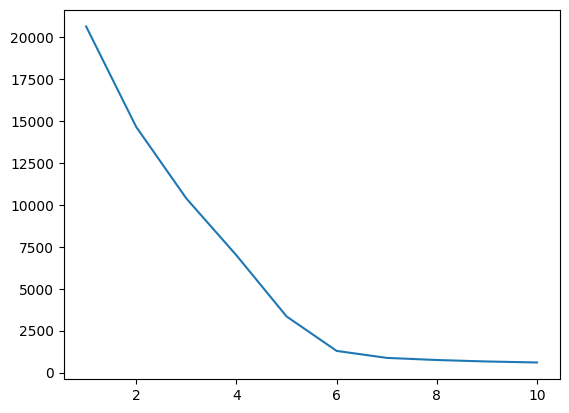

In [1074]:
plt.plot(range(1,11),wcss)
plt.show()

In [1075]:
pip install kneed

In [1076]:
from kneed import KneeLocator
kneed=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [1077]:
kneed.elbow

5

In [1078]:
from sklearn.metrics import silhouette_score

In [1079]:
silhouette=[]

for i in range(2,11):
  kmeans_model=KMeans(n_clusters=i,init="k-means++")
  kmeans_model.fit(scaled_A)
  score=silhouette_score(scaled_A,kmeans_model.labels_)
  silhouette.append(score)

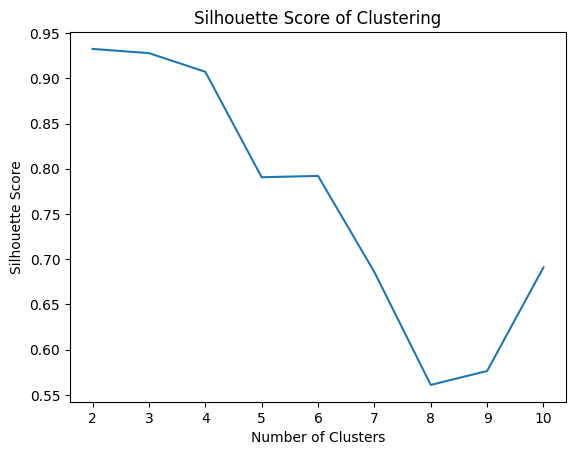

In [1080]:
plt.plot(range(2,11),silhouette)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score of Clustering")
plt.show()

In [1081]:
score=silhouette_score(scaled_A,kmeans_model.labels_)
score

0.6910074005521175

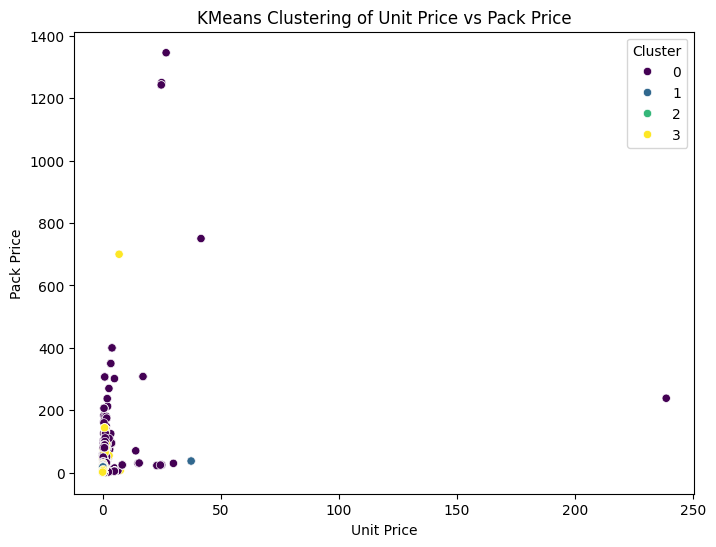

In [1082]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["unit price"], y=df["pack price"], hue=df['shipment mode'], palette='viridis')
plt.xlabel("Unit Price")
plt.ylabel("Pack Price")
plt.title("KMeans Clustering of Unit Price vs Pack Price")
plt.legend(title="Cluster")
plt.show()


Applying log transformation to the model

In [1083]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ID                          10324 non-null  int64         
 1   project code                10324 non-null  object        
 2   country                     10324 non-null  int64         
 3   fulfill via                 10324 non-null  int64         
 4   vendor inco term            10324 non-null  int64         
 5   shipment mode               10324 non-null  int64         
 6   scheduled delivery date     10324 non-null  datetime64[ns]
 7   delivered to client date    10324 non-null  datetime64[ns]
 8   product group               10324 non-null  object        
 9   sub classification          10324 non-null  object        
 10  vendor                      10324 non-null  int64         
 11  molecule/test type          10324 non-null  int64     

In [1084]:
from sklearn.cluster import DBSCAN
dbscan_model=DBSCAN(eps=0.5,min_samples=5)

In [1085]:
dbscan_pred=dbscan_model.fit_predict(scaled_A)

In [1086]:
np.sum(dbscan_pred==-1)

26

In [1087]:
outlier_perc=100*(np.sum(dbscan_pred==-1)/len(dbscan_pred))
print(outlier_perc)

0.25184037194885706


In [1088]:
from sklearn.cluster import AgglomerativeClustering
agglo_model=AgglomerativeClustering(n_clusters=4)
agglo_pred=agglo_model.fit_predict(scaled_A)

In [1089]:
pip install scipy

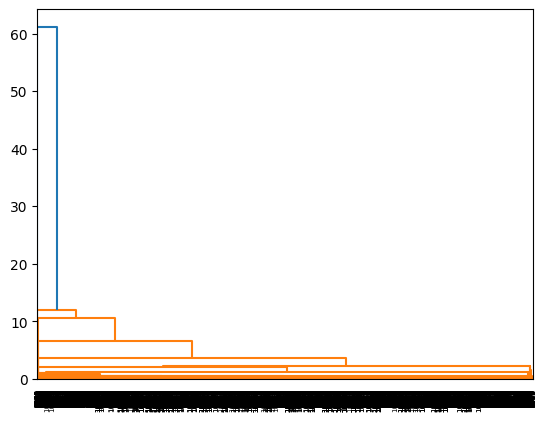

In [1121]:
from scipy.cluster.hierarchy import dendrogram,linkage
dendrogram(linkage(scaled_A))
plt.show()

PCA

In [1122]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)

In [1123]:
df_pca=df[["line item value","line item insurance (usd)","line item quantity"]]

In [1124]:
pca_df=pca.fit_transform(df_pca)

In [1125]:
data=pd.DataFrame(pca_df,columns=["PC1","PC2"])

In [1126]:
pca.explained_variance_ratio_

array([0.99611106, 0.00388877])

In [1127]:
data

,PC1,PC2
0,-1.581356e+05,-2955.147853
1,-1.524180e+05,-2527.933414
2,-1.188268e+05,-6311.263577
3,-2.882544e+04,16467.580509
4,-3.396791e+04,23078.791741
...,...,...
10319,4.543222e+05,104568.849365
10320,-1.989895e+04,4696.110802
10321,5.007104e+06,9495.687843
10322,-4.365586e+04,3392.357013


DBSCAN performs a little better than KMeans.

Deep Leanring

In [1128]:
pip install tensorflow

In [1129]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [1136]:
ann=Sequential()

In [1137]:
X=["shipment mode","line item quantity","line item value","fulfill via","first line designation","unit price"]

In [1138]:
len(X)

6

In [1139]:
y=["line item insurance (usd)"]

In [1140]:
df_new=df[X+y]

In [1141]:
X_train,X_test,y_train,y_test=train_test_split(df_new[X],df_new[y],test_size=0.2,random_state=42)

In [1142]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8259, 6)
(2065, 6)
(8259, 1)
(2065, 1)


In [1143]:
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)

In [1144]:
scaled_y_train=scaler.fit_transform(y_train)
scaled_y_test=scaler.transform(y_test)

In [1145]:
ann.add(Dense(units=32,activation="relu",input_shape=(6,)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [1146]:
ann.add(Dense(units=16,activation="relu"))

In [1147]:
ann.add(Dense(units=1,activation="linear"))

In [1148]:
ann.compile(optimizer="adam",loss="mse",metrics=["mae"])

In [1149]:
ann.summary()

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_125 (Dense)                    │ (None, 32)                  │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_126 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_127 (Dense)                    │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 769 (3.00 KB)

 Trainable params: 769 (3.00 KB)

 Non-trainable params: 0 (0.00 B)

In [1150]:
from tensorflow.keras.callbacks import EarlyStopping

In [1151]:
early_stop=EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=25)

In [1152]:
ann.fit(scaled_X_train,scaled_y_train,batch_size=32,epochs=50,validation_data=(scaled_X_test,scaled_y_test),callbacks=[early_stop])

Epoch 1/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.7882 - mae: 0.4152 - val_loss: 0.0723 - val_mae: 0.1290
Epoch 2/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0762 - mae: 0.1307 - val_loss: 0.0705 - val_mae: 0.1227
Epoch 3/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0806 - mae: 0.1303 - val_loss: 0.0683 - val_mae: 0.1201
Epoch 4/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0862 - mae: 0.1289 - val_loss: 0.0635 - val_mae: 0.1116
Epoch 5/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0679 - mae: 0.1180 - val_loss: 0.0616 - val_mae: 0.1255
Epoch 6/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0660 - mae: 0.1186 - val_loss: 0.0692 - val_mae: 0.1209
Epoch 7/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0713 - mae: 0.1147 - val_loss: 0.0760 - val_mae: 0.1230
Epoch 8/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0694 - mae: 0.1190 - val_loss: 0.0606 - val_mae: 0.1175
Epoch 9/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - lo

In [1154]:
y_pred=ann.predict(scaled_X_test)

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [1155]:
y_pred_=y_pred.flatten()
y_actual=y_test.values.flatten()

for i in range(10):
    print(f"Actual:{y_actual[i]:.2f} | Predicted:{y_pred_[i]:.2f}")


Actual:992.07 | Predicted:0.96
Actual:41.77 | Predicted:-0.37
Actual:220.50 | Predicted:-0.02
Actual:275.07 | Predicted:0.16
Actual:100.75 | Predicted:-0.27
Actual:1.16 | Predicted:-0.47
Actual:57.88 | Predicted:-0.33
Actual:11.78 | Predicted:-0.44
Actual:159.13 | Predicted:-0.10
Actual:24.70 | Predicted:-0.41


ANN is not working well on this dataset.

Trying out PolynomialRegression for non linear features.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [1156]:
X=df[["unit price","line item insurance (usd)","freight cost (usd)","pack price","dosage form"]]

In [1157]:
y=df["line item value"]

In [1158]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [1159]:
poly_model=make_pipeline(PolynomialFeatures(degree=2),LinearRegression())

In [1160]:
poly_model.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [1161]:
y_pred=poly_model.predict(X_test)

In [1162]:
y_pred

array([660163.43463489,  30575.48145095, 111868.32195627, ...,
       -27035.49594426,  54495.95457343,  -2832.11468534])

In [1163]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [1164]:
print(mse)
print(mae)
print(r2)

9152328807.039679
37450.95443312967
0.9179659388331299
